<a href="https://colab.research.google.com/github/joseph-tech-dev/machine-learning/blob/main/breast-cancer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Accuracy: 0.98
              precision    recall  f1-score   support

           B       0.99      0.98      0.99       108
           M       0.97      0.98      0.98        63

    accuracy                           0.98       171
   macro avg       0.98      0.98      0.98       171
weighted avg       0.98      0.98      0.98       171



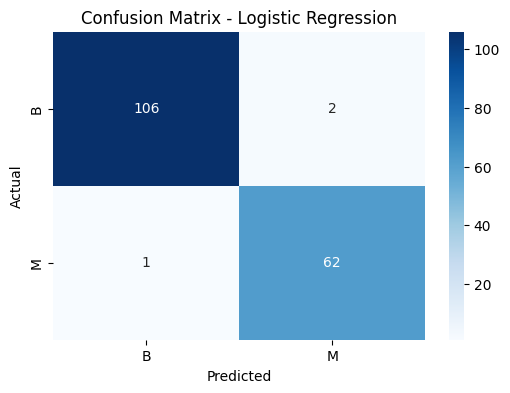

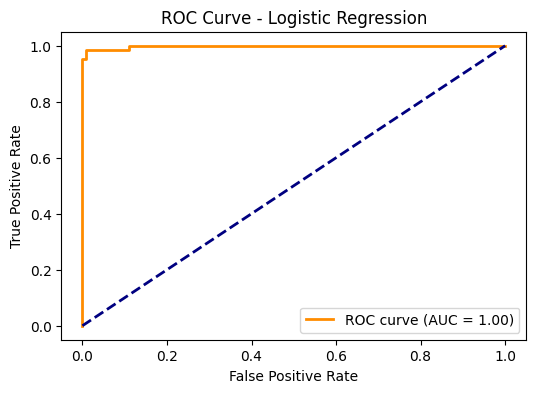

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score



'''
Your task is to use logistic regression to model the probability that a tumor is malignant given the input features,
evaluate how well the model works, and interpret the results.
'''

# Reading the dataset
# Base features
# 10 base feature names
features = [
    "radius", "texture", "perimeter", "area", "smoothness",
    "compactness", "concavity", "concave_points", "symmetry", "fractal_dimension"
]

# Expandind the features to 32
columns = ["id","diagnosis"]
for f in features:
    columns.append(f + "_mean")
for f in features:
    columns.append(f + "_se")
for f in features:
    columns.append(f + "_worst")

# Reading the csv file with pandas
df = pd.read_csv("wdbc.data",header=None, names=columns)
#print(df.shape)

# viewing the data types
#df.info()
#print(df.describe())
#print(df.diagnosis)

# Independent features X and Target variable y
X = df.drop(["id","diagnosis"],axis=1)
y = df["diagnosis"]

# Spliting the data into Testing and Training dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

# Normalizing the data
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
#print(X_scaled)

# Defining our Logistic regression model
lm = LogisticRegression()

# Training the model
lm.fit(X_train_scaled, y_train)

# Printing the model coeficients and the Intercept
#print(f"Coeficients: {lm.coef_}")
#print(f"Intercept: {lm.intercept_}")

# Predicting Diagnosis with out trained models
y_pred = lm.predict(X_test_scaled)
#print(y_pred)

# Evaluating the model
accuracy = accuracy_score(y_test, y_pred, normalize=True)
print(f"Accuracy: {accuracy:.2f}")

# Classification Report
print(classification_report(y_test, y_pred))

# Visualization of the plot
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=lm.classes_, yticklabels=lm.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Logistic Regression")
plt.show()

# --- ROC Curve ---
# Get predicted probabilities for the positive class (Malignant)
y_pred_proba = lm.predict_proba(X_test_scaled)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test.map({'B':0, 'M':1}), y_pred_proba)
roc_auc = roc_auc_score(y_test.map({'B':0, 'M':1}), y_pred_proba)

plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, color="darkorange", lw=2, label=f"ROC curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color="navy", lw=2, linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Logistic Regression")
plt.legend(loc="lower right")
plt.show()


In [3]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print(f'User uploaded file "{fn}" with length {len(uploaded[fn])} bytes')

Saving wdbc.data to wdbc.data
User uploaded file "wdbc.data" with length 124103 bytes
